In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.optimize as spo
import scipy.interpolate as spi
import particle_evolution
import feo_thermodynamics as feot
import earth_model
import flayer
import nucleation

Pressure at ICB: 329.1010089948369 GPa
Pressure at top of F-layer 317.7026904318656 GPa
g at ICB: 4.403124222842614 m/s**2
g at top of F-layer 5.010242771751181 m/s**2


/Users/andreww/miniforge3/envs/py39/lib/python3.9/site-packages/numpy/lib/function_base.py:2197: RuntimeWarning: invalid value encountered in find_liquidus (vectorized)
  outputs = ufunc(*inputs)


Temperature at CMB is 4225.944695087244 K
Temberature at top of F-layer is 5676.644650924956 K
Temberature at ICB is 5764.191075723928 K


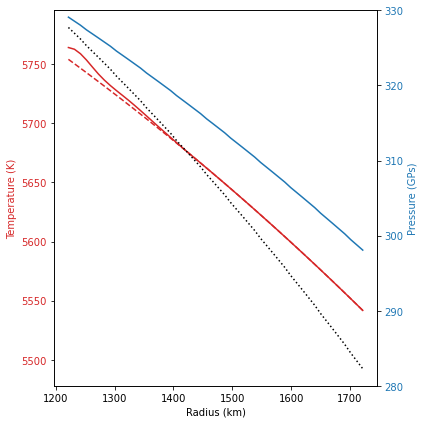

In [2]:
# This is where we set all the F-layer parameters. Quite slow (due to liquidus calc I think)

# F-layer setup
radius_inner_core = 1221.5e3
f_layer_thickness = 200.0e3
radius_top_flayer = radius_inner_core + f_layer_thickness # 200 km thick.
radius_cmb = 3480.0e3 # We only need this for setup.
gamma = 1.5
analysis_points = np.linspace(
    radius_inner_core, radius_top_flayer, 5)

# Check PREM works ... and print some interesting values
prem = earth_model.Prem()
print("Pressure at ICB:", prem.pressure(radius_inner_core/1000.0), "GPa")
print("Pressure at top of F-layer", prem.pressure(radius_top_flayer/1000.0), "GPa")
print("g at ICB:", prem.gravity(radius_inner_core/1000.0), "m/s**2")
print("g at top of F-layer", prem.gravity(radius_top_flayer/1000.0), "m/s**2")

# Generate the functions for temperautre,
# composition, pressure and gravity
tfunc, atfunc, ftfunc, t_func_creator, xfunc, pfunc, \
    gfunc = flayer.setup_flayer_functions(radius_inner_core, radius_cmb, f_layer_thickness, 
                                                    gamma, -10.0, 0.95, 0.95, analysis_points)

print("Temperature at CMB is", tfunc(radius_cmb), "K")
print("Temberature at top of F-layer is", tfunc(radius_top_flayer), "K")
print("Temberature at ICB is", tfunc(radius_inner_core), "K")

# Interpolate onto radius for plotting
rs = np.linspace(radius_inner_core, radius_inner_core+500.0E3)
ts = tfunc(rs)
ats = atfunc(rs)
ps = pfunc(rs)
xs = xfunc(rs)
# Find the P-X dependent liquidus (storing the temperature at each point)
tl = feot.find_liquidus(xs, ps)


# Plot the F-layer setup alongside the liquidus
fig, ax1 = plt.subplots(figsize=(6,6), tight_layout=True)

color = 'tab:red'
ax1.set_xlabel('Radius (km)')
ax1.set_ylabel('Temperature (K)', color=color)
ax1.plot(rs/1000.0, ts, color=color)
ax1.plot(rs/1000.0, ats, color=color, ls='--')
ax1.plot(rs/1000.0, tl, color='k', ls=':')

ax1.tick_params(axis='y', labelcolor=color)
#ax1.set_ylim([5900, 6200])

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Pressure (GPs)', color=color)  
ax2.plot(rs/1000.0, ps, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([280, 330])

fig.tight_layout()  
plt.show()

In [3]:
rc_s = []
i_s = []
gc_s = []
for x, p, t in zip(xs, ps, ts):
    rc, i, gc = nucleation.calc_nucleation(x, p, t, 1.08E-1, 1.0E-9, theta=7.0)
    rc_s.append(rc)
    i_s.append(i)
    gc_s.append(gc)
    


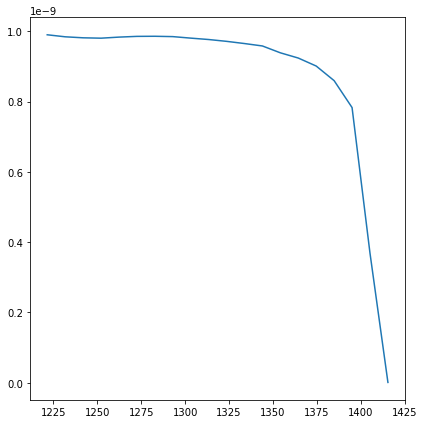

In [4]:
fig, ax = plt.subplots(figsize=(6,6), tight_layout=True)
ax.plot(rs/1000.0, i_s)